<ipython-input-8-201eda21377b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)  # Impute categorical with mode


Cleaned Chronic Kidney Disease Dataset:
  bp (Diastolic)              bp limit     sg   al class       rbc   su  \
0            Low                Normal  1.019  1.0   Yes    Normal  NaN   
1            Low                Normal  1.009  0.0   Yes    Normal  NaN   
2            Low                Normal  1.009  4.0   Yes  Abnormal  NaN   
3         Normal  Stage 1 Hypertension  1.009  3.0   Yes    Normal  NaN   
4            Low                Normal  1.015  0.0   Yes    Normal  NaN   

         pc          pcc           ba  ...  htn   dm  cad  appet   pe  ane  \
0    Normal  Not present  Not present  ...   No   No   No   Good   No   No   
1    Normal  Not present  Not present  ...   No   No   No   Good   No   No   
2  Abnormal  Not present      Present  ...   No   No   No   Poor   No   No   
3    Normal  Not present  Not present  ...   No   No   No   Good   No   No   
4    Normal  Not present  Not present  ...   No  Yes   No   Poor  Yes   No   

       grf    stage  affected   age  
0 

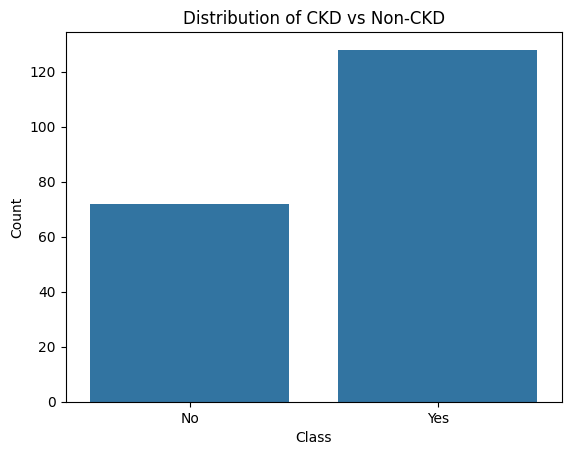

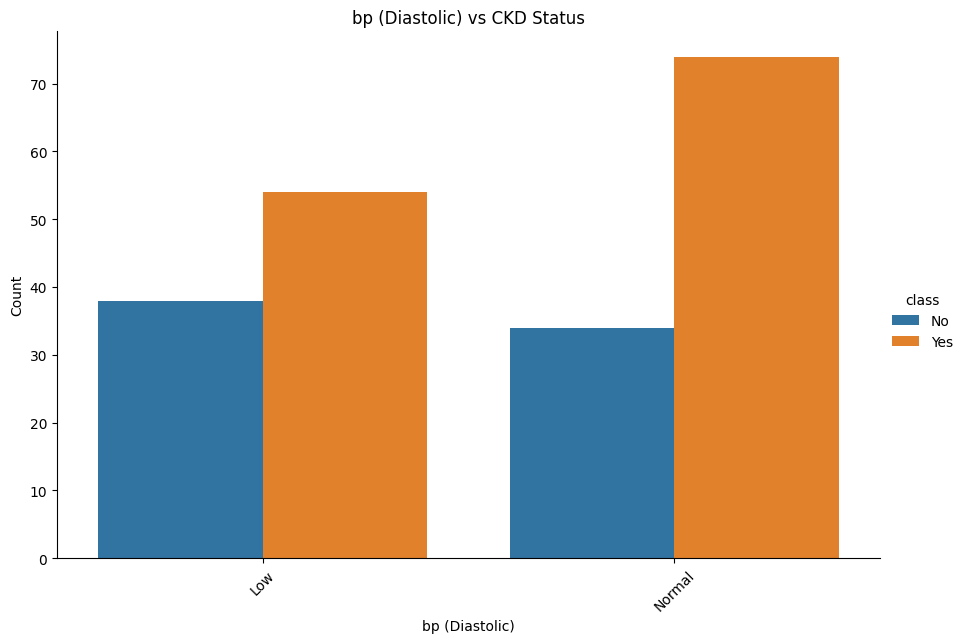

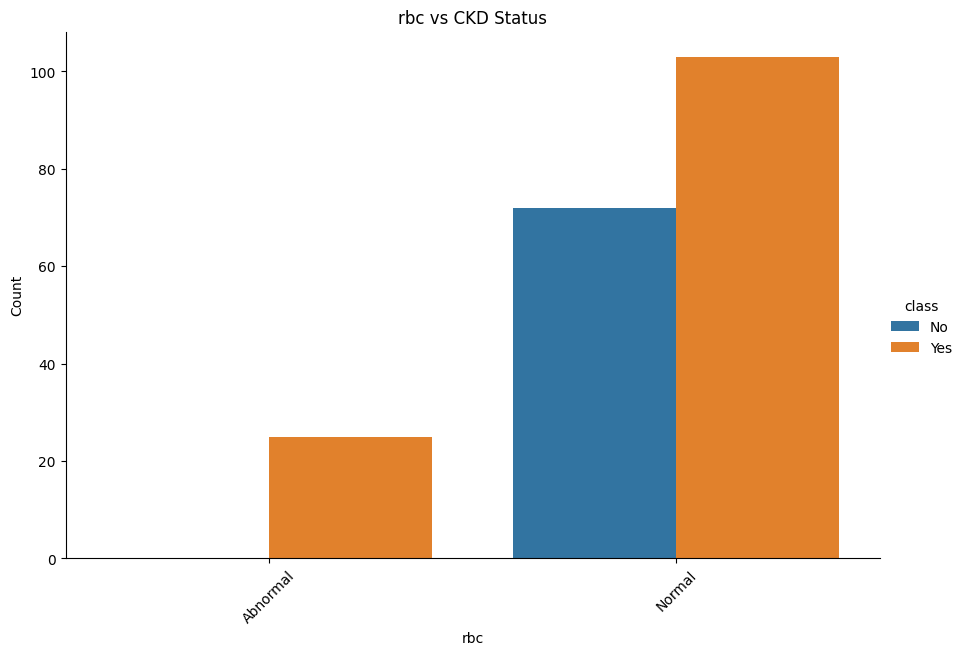

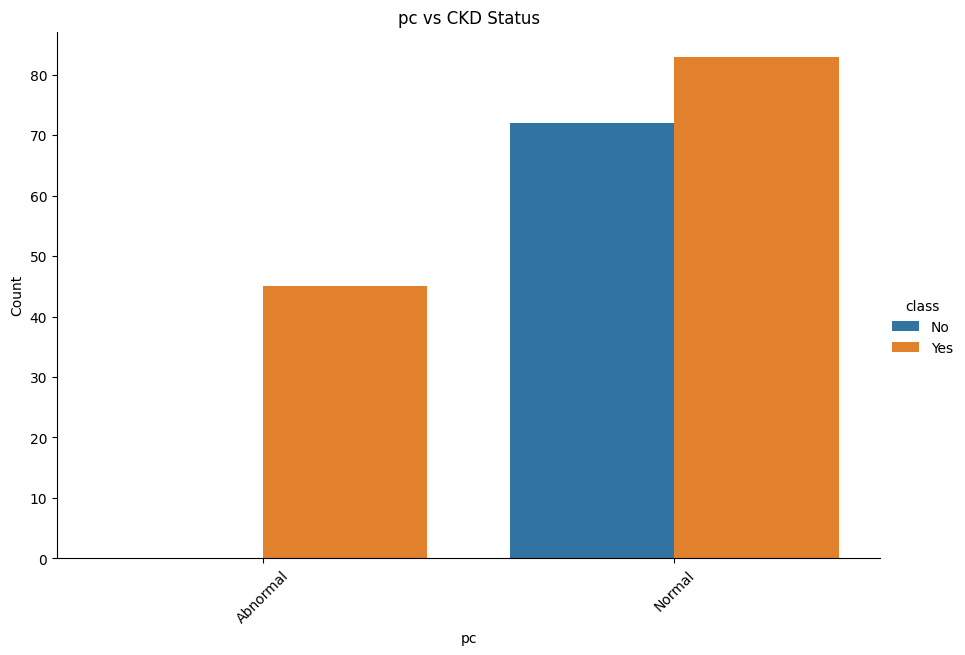

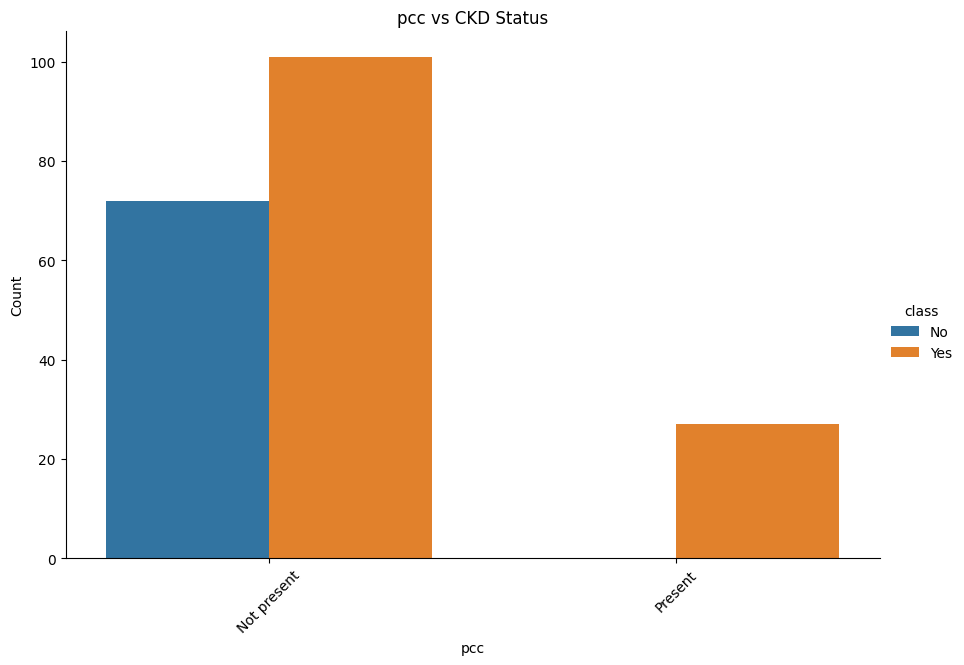

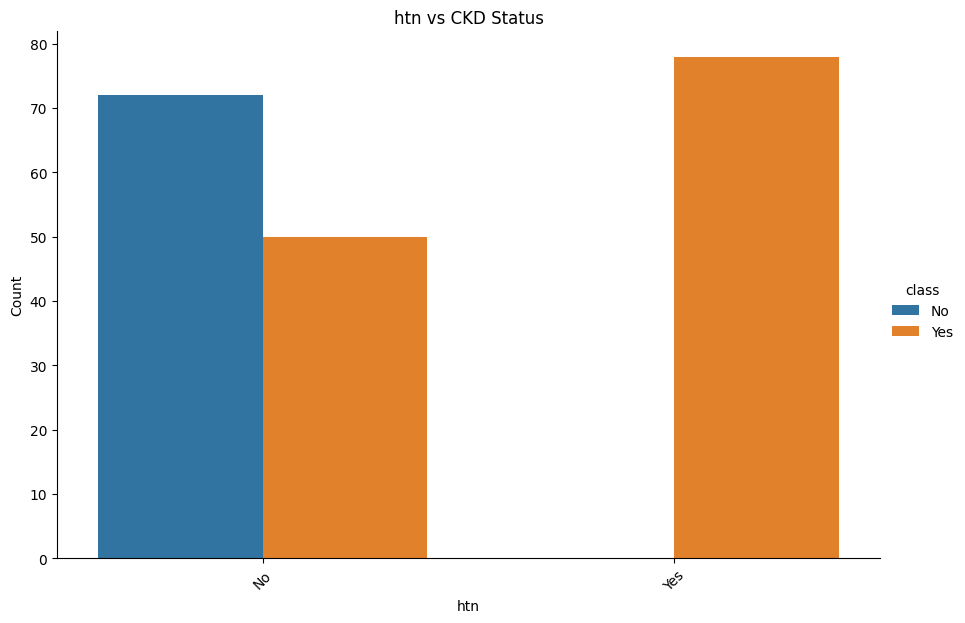

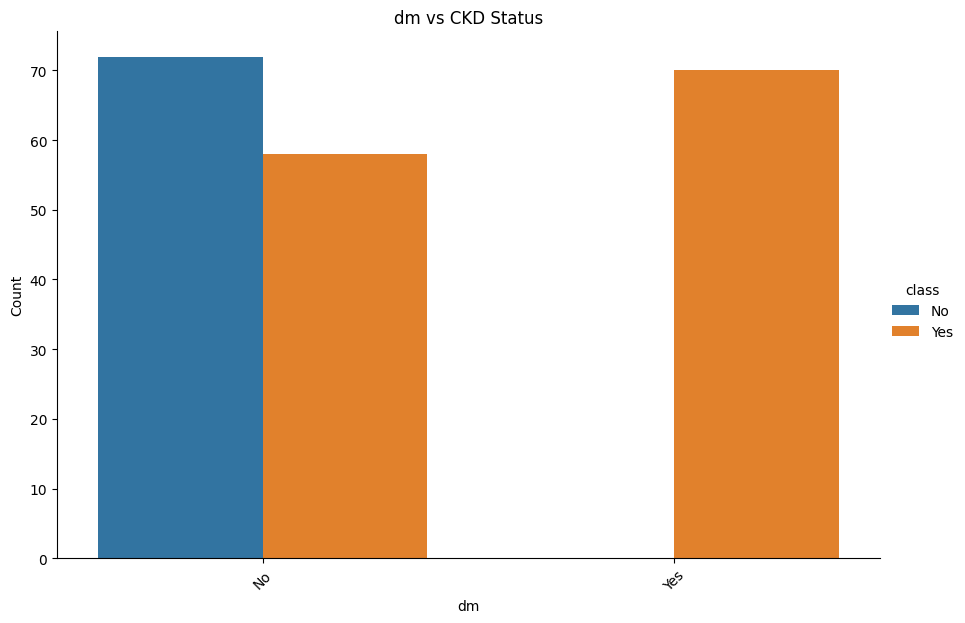

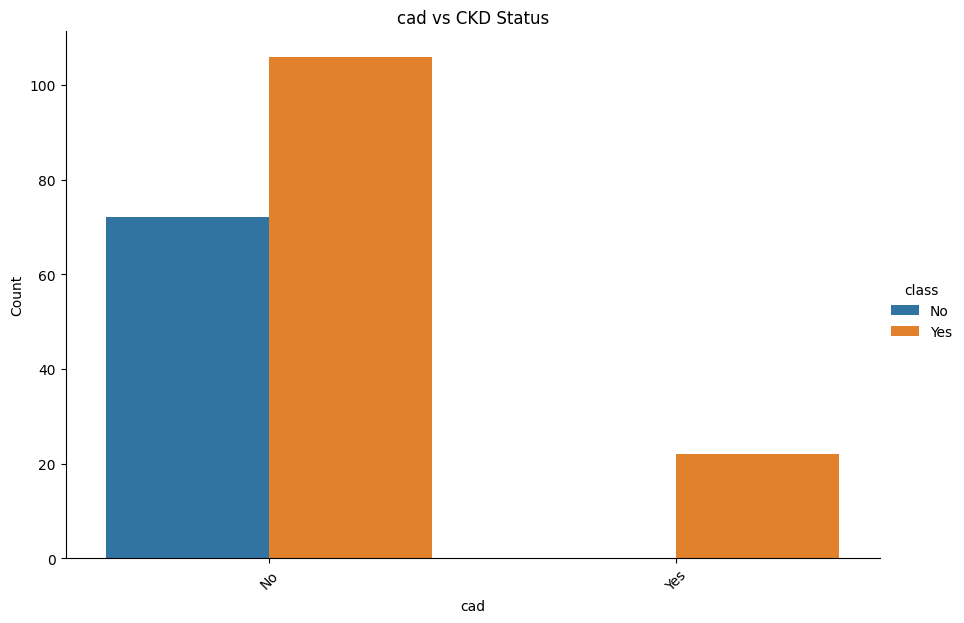

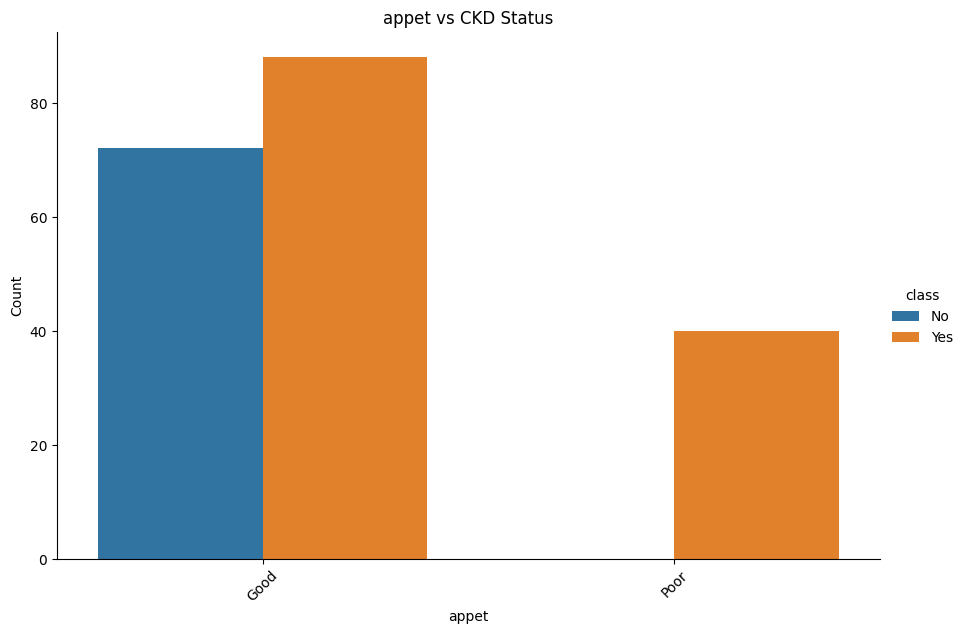

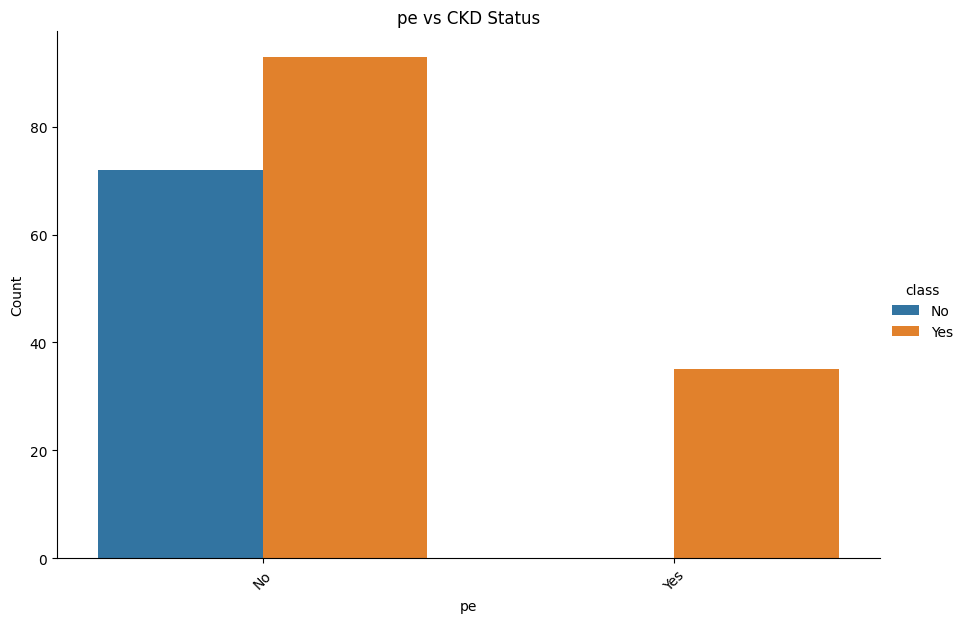

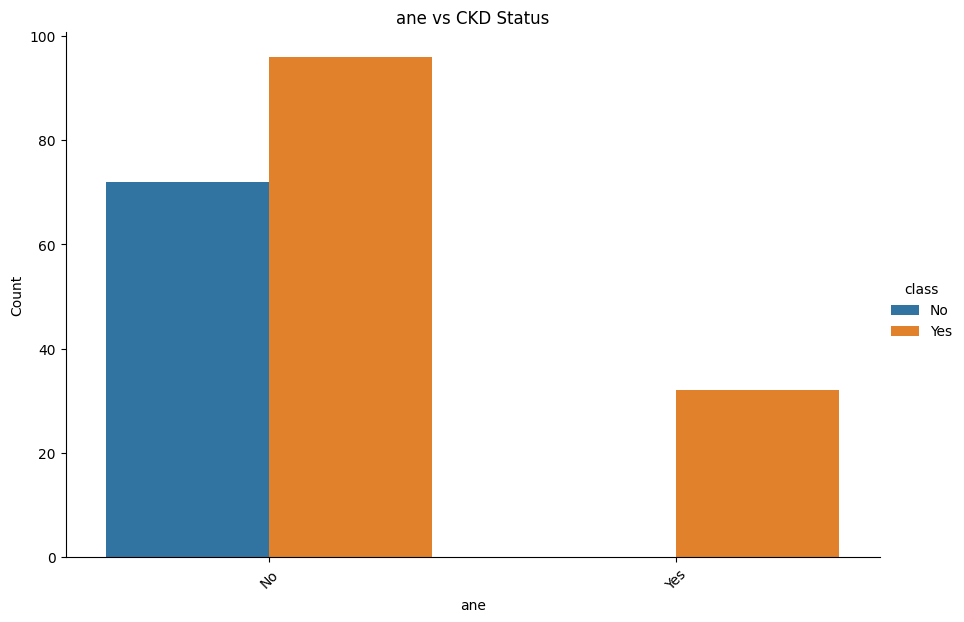

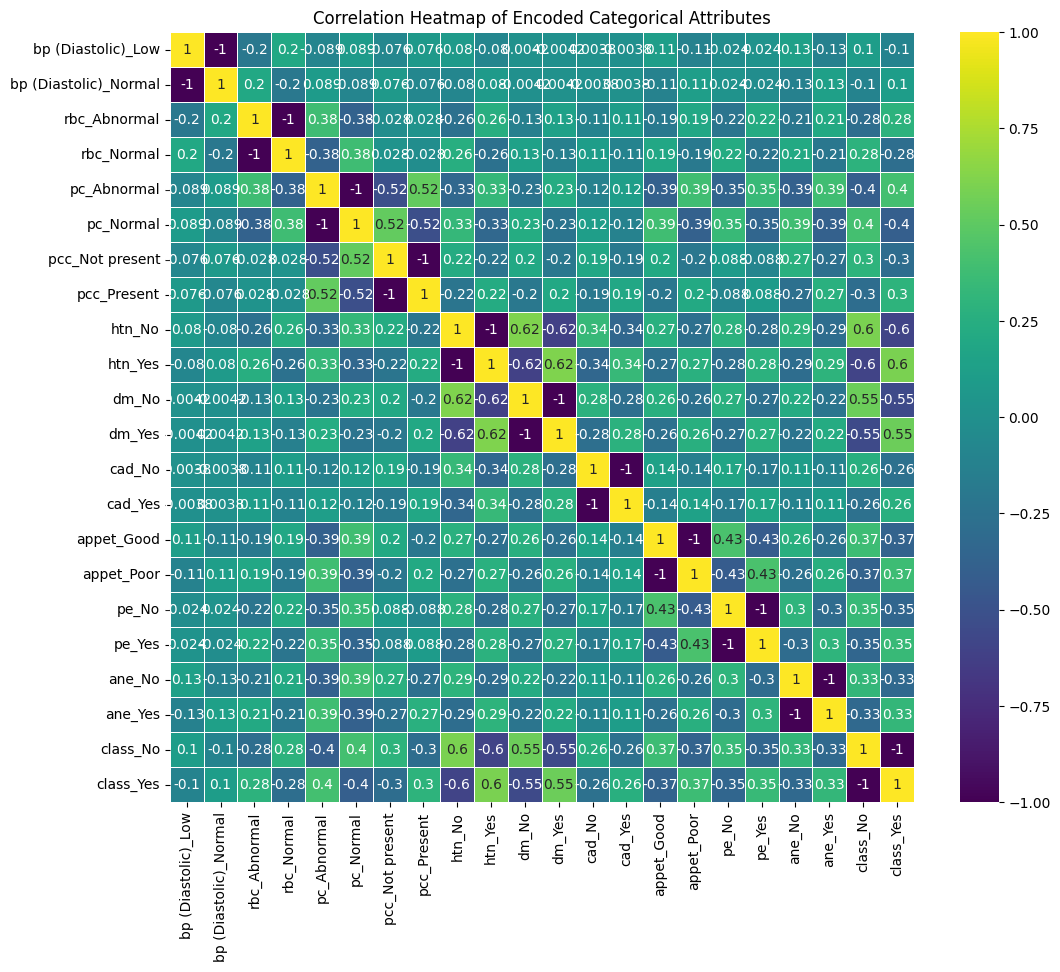

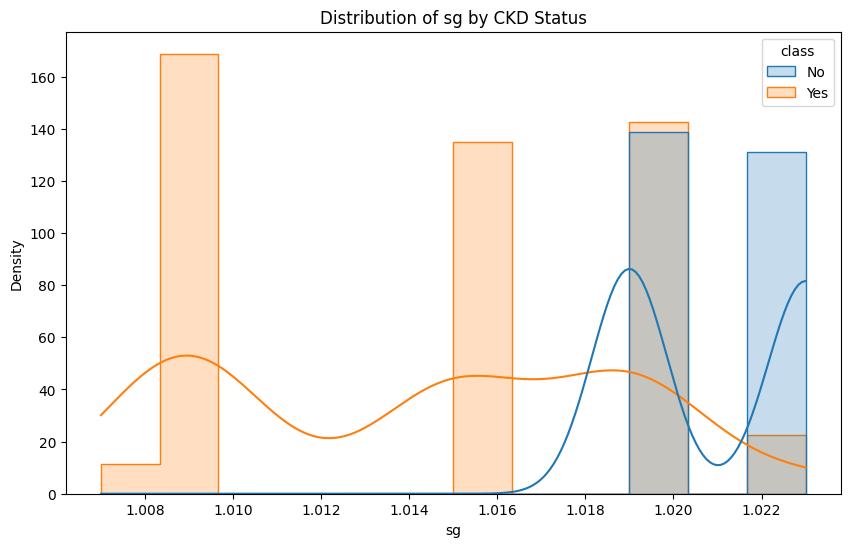

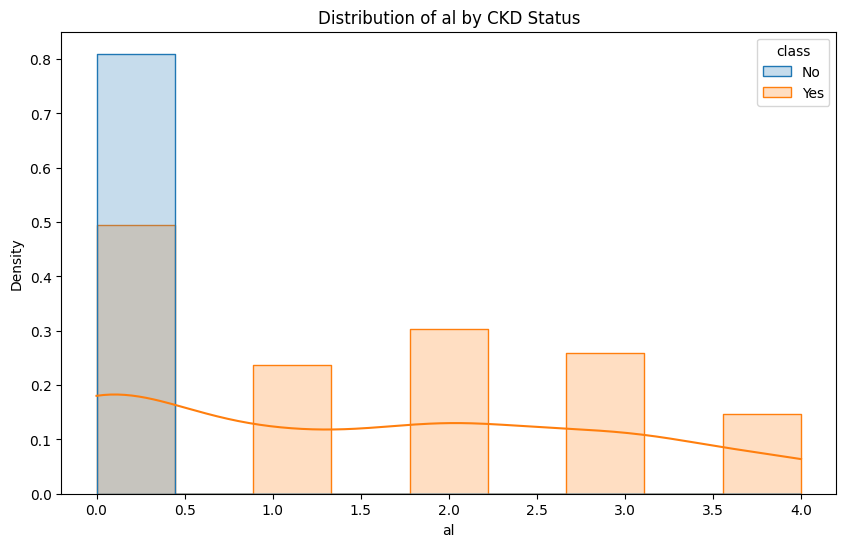

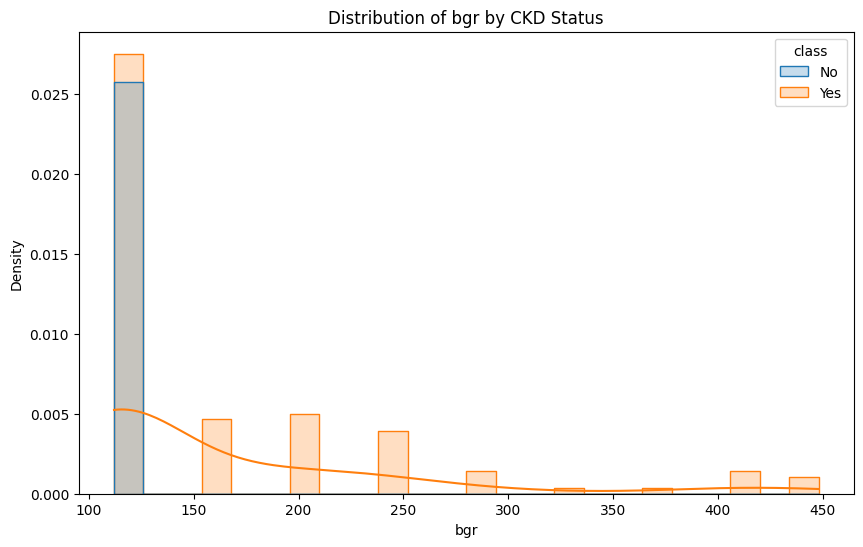

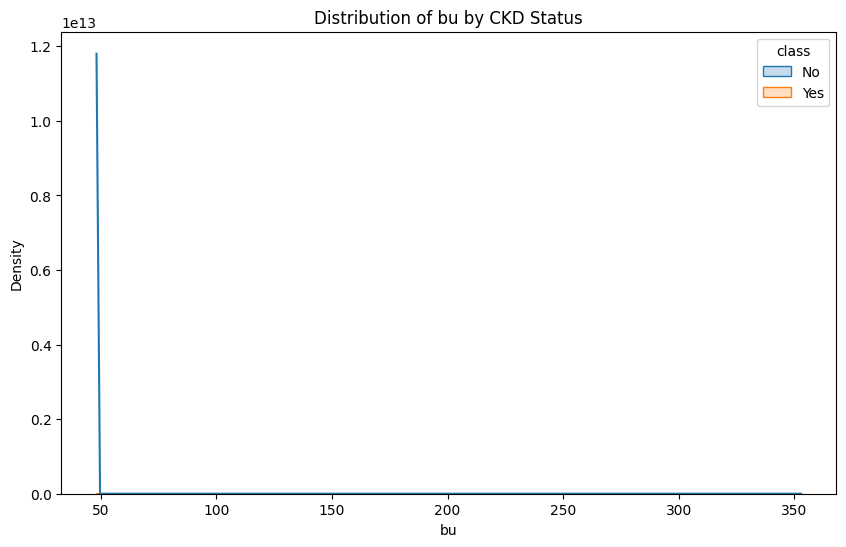

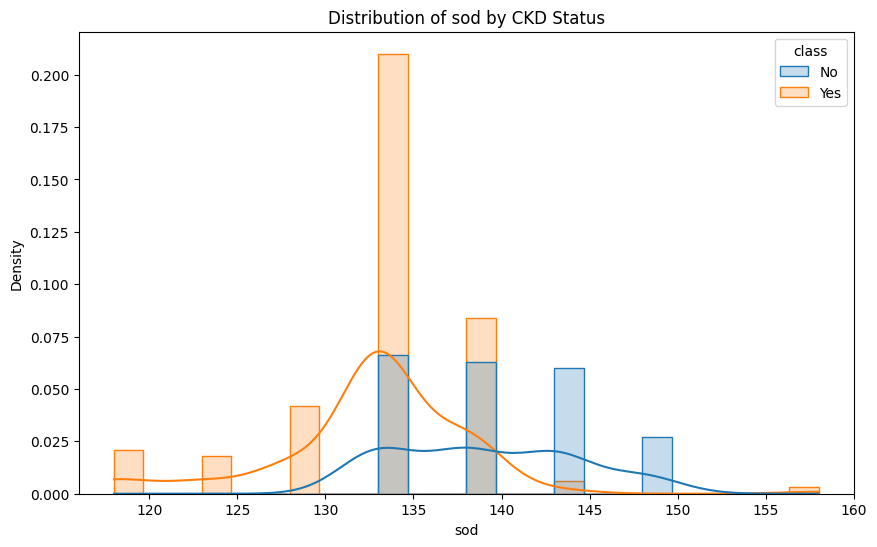

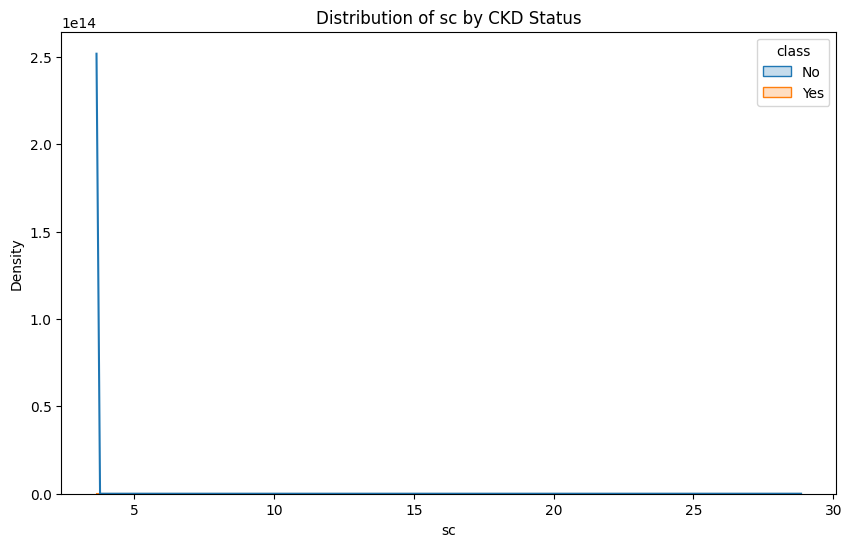

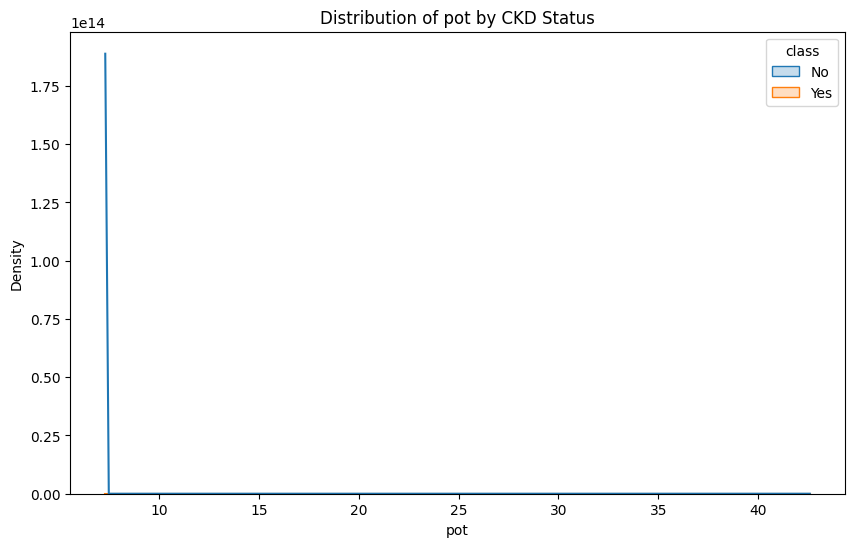

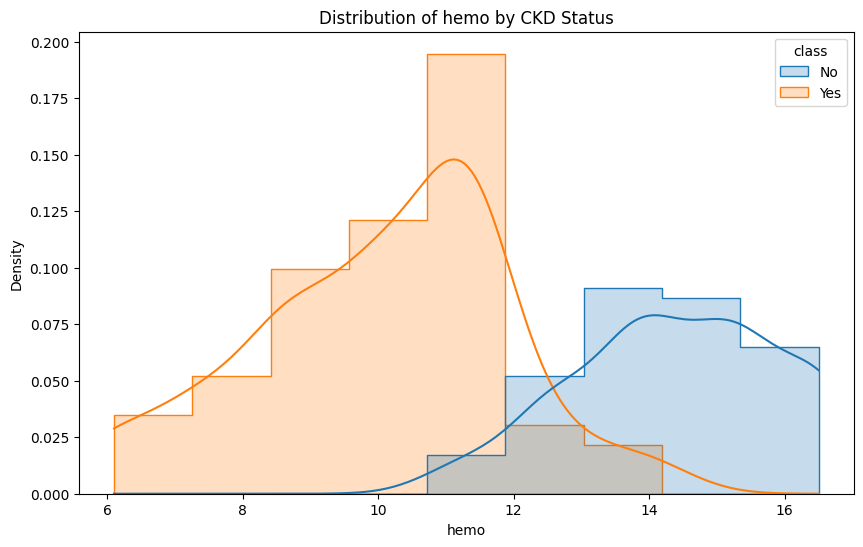

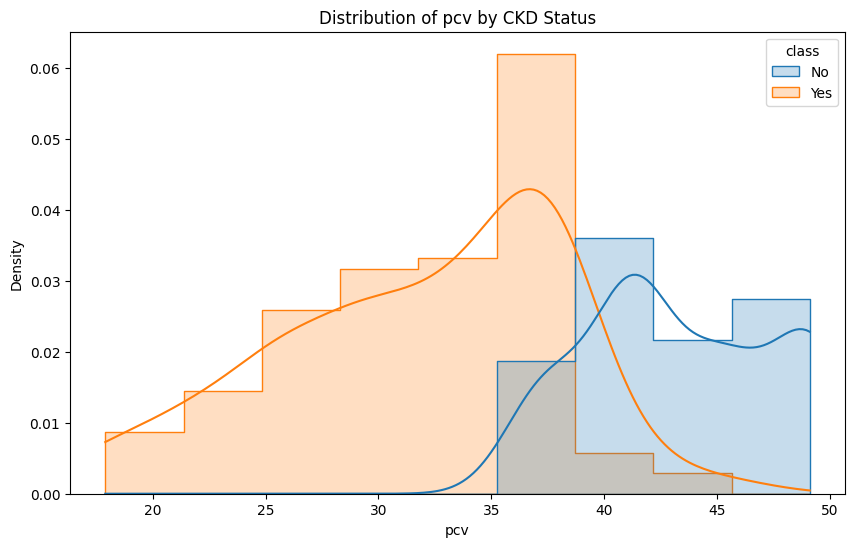

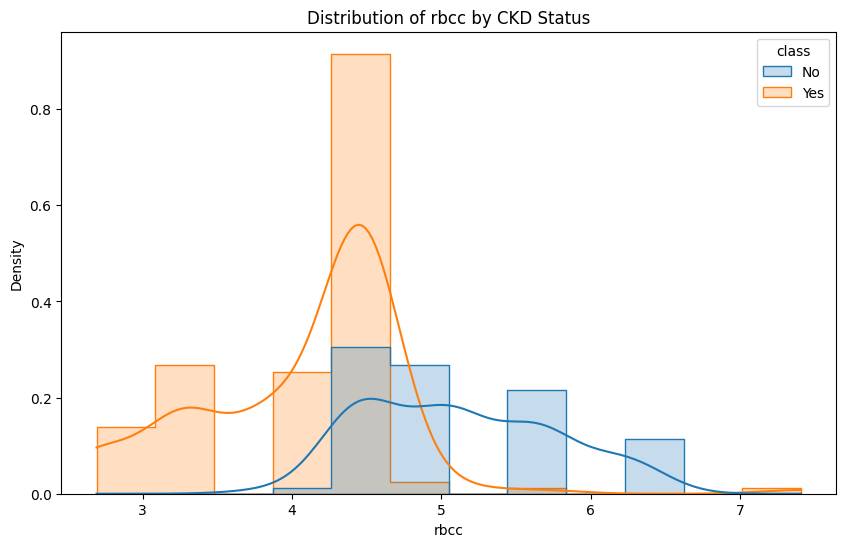

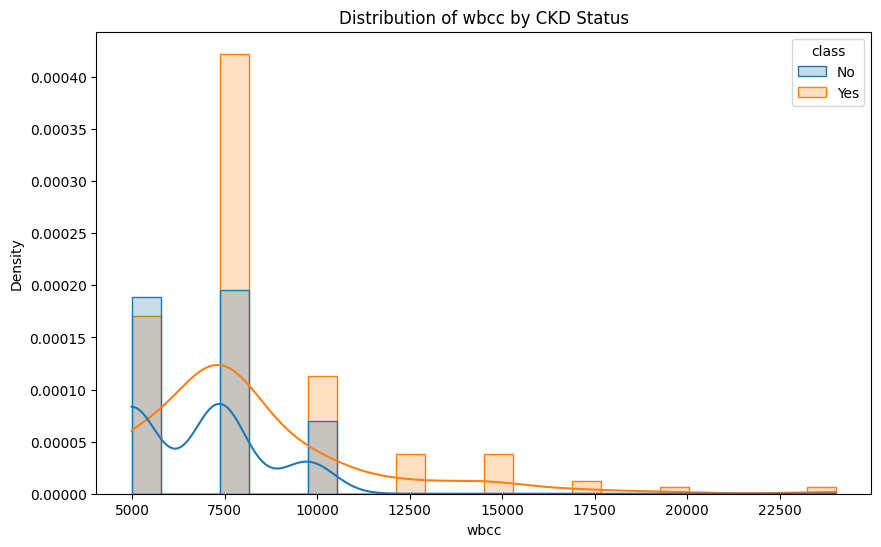

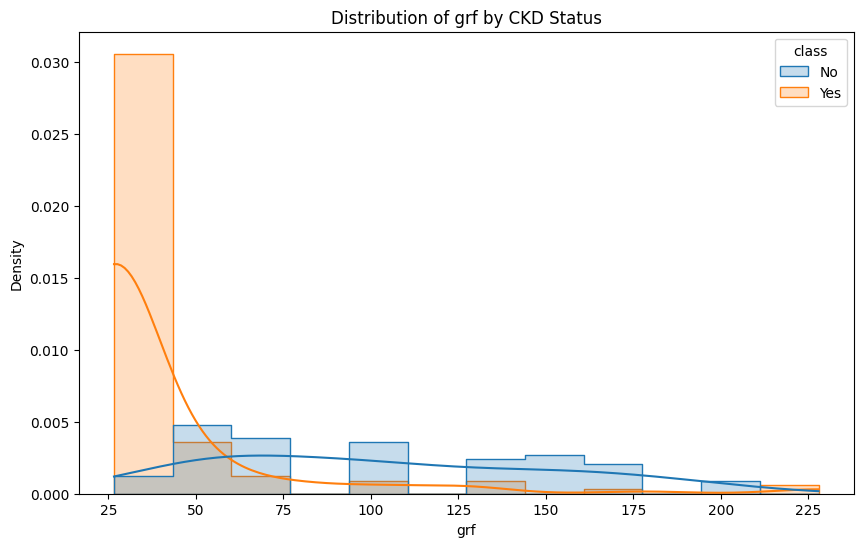

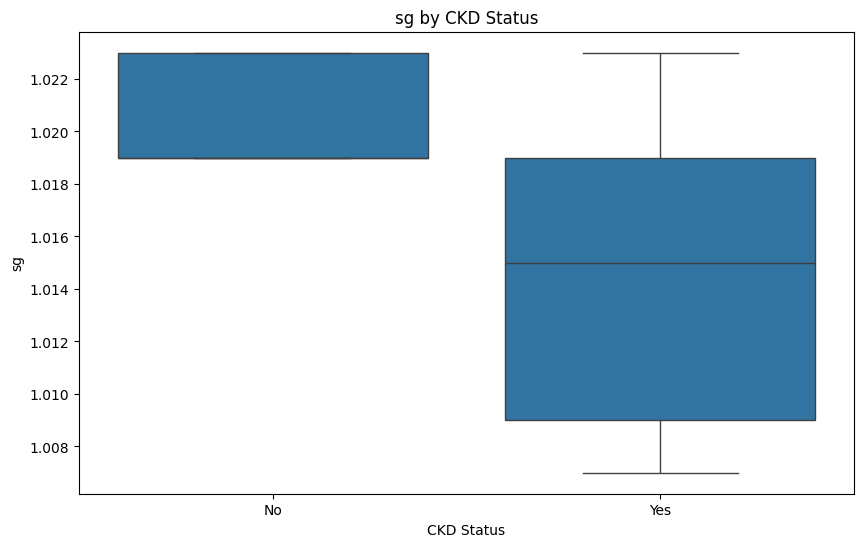

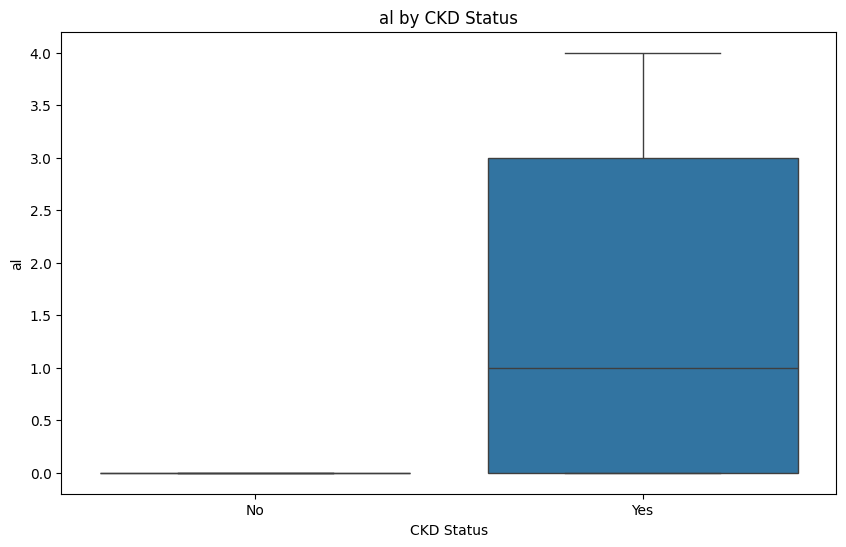

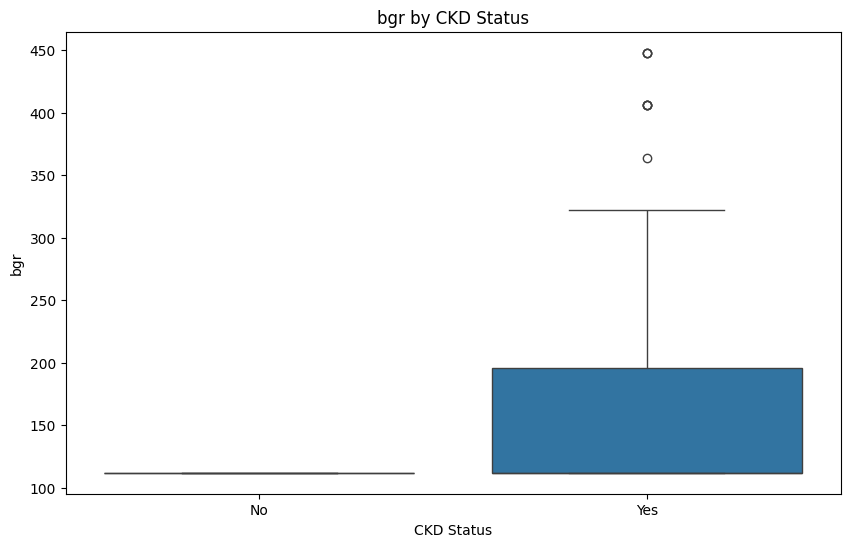

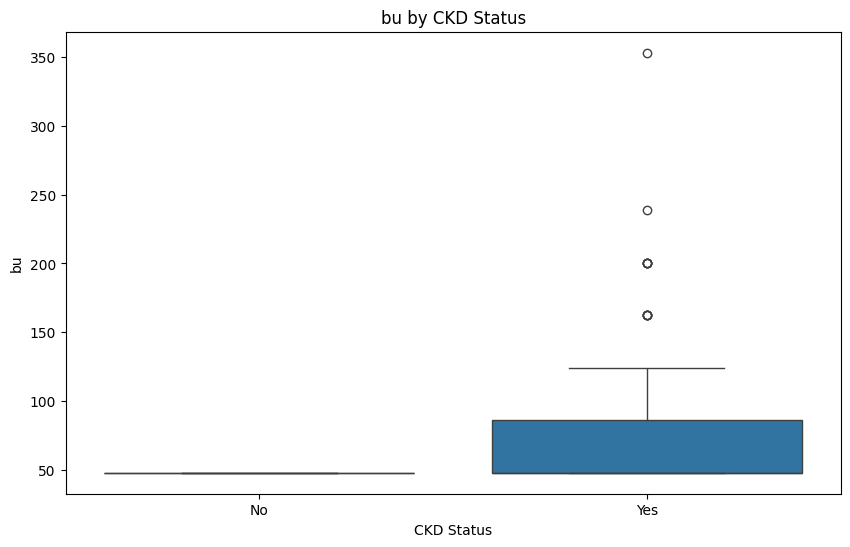

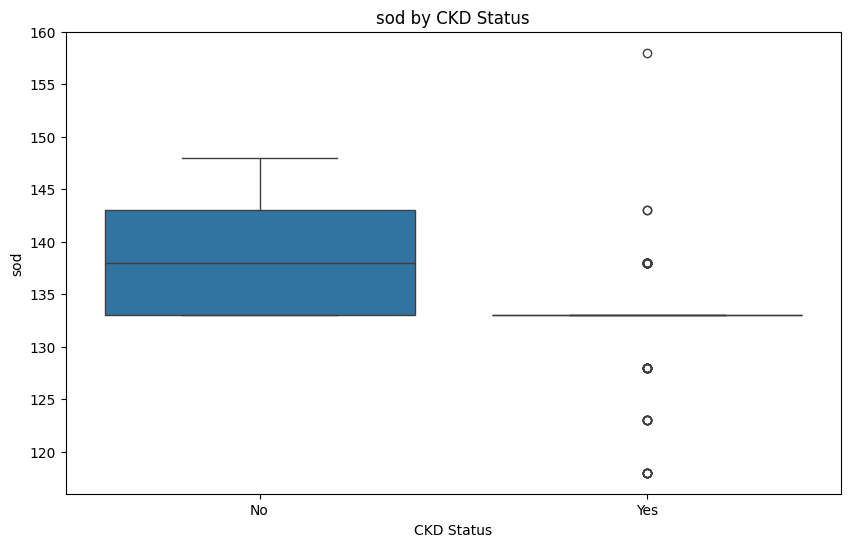

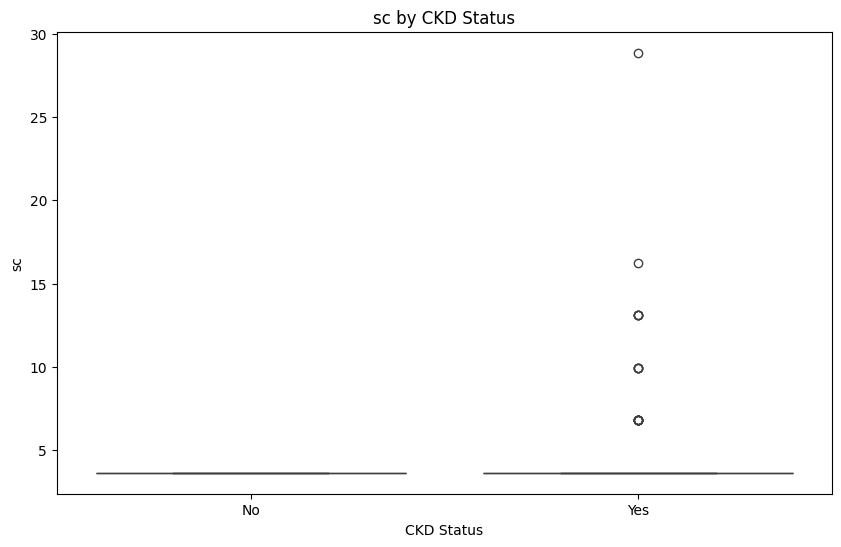

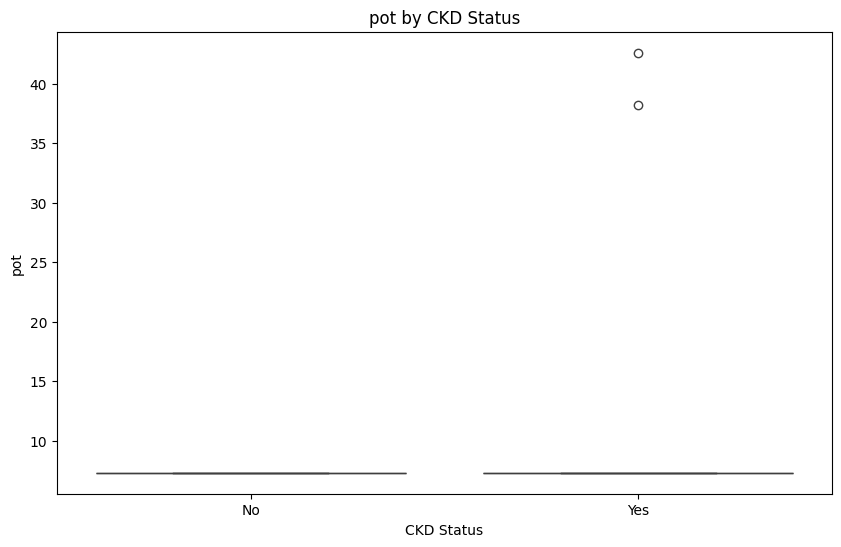

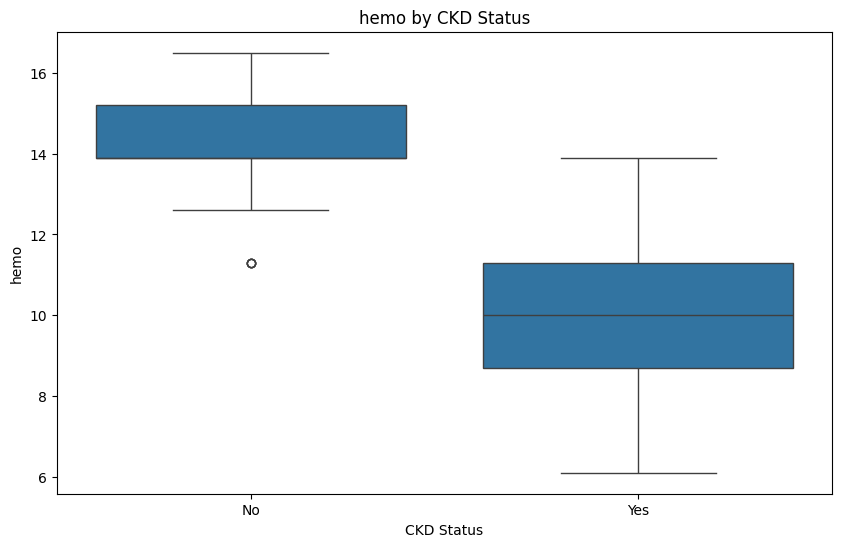

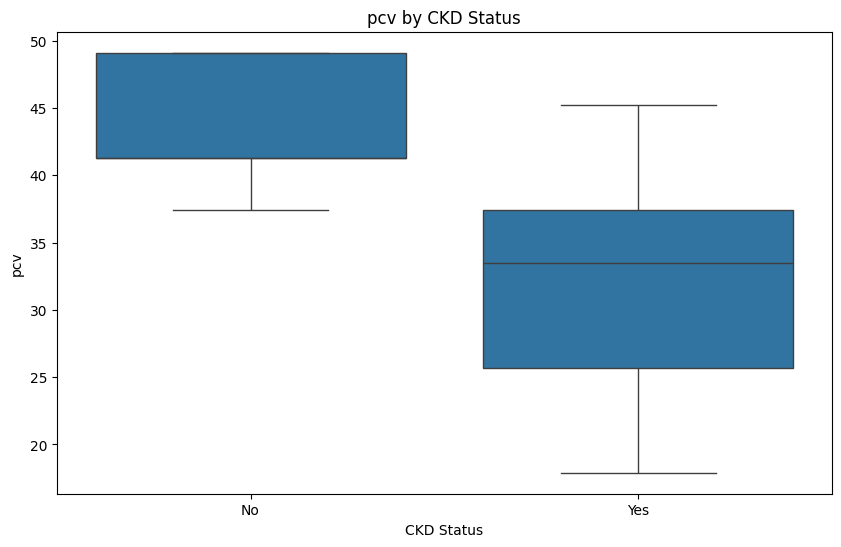

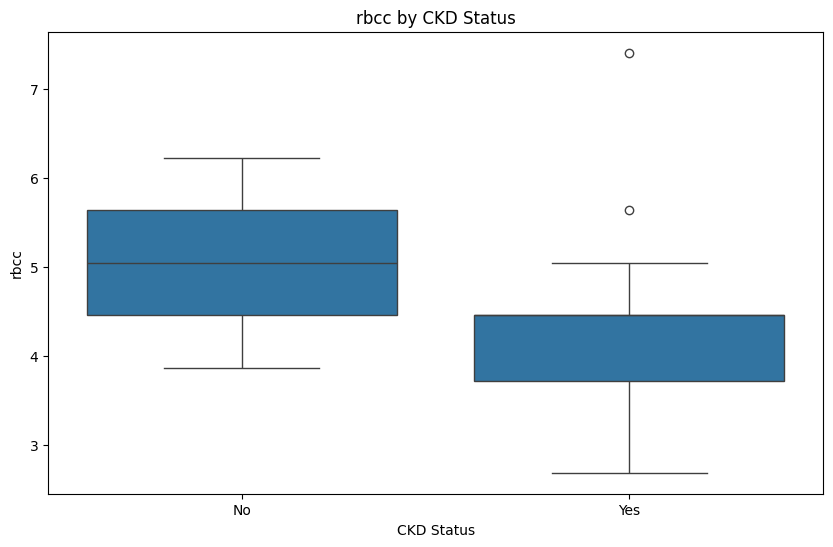

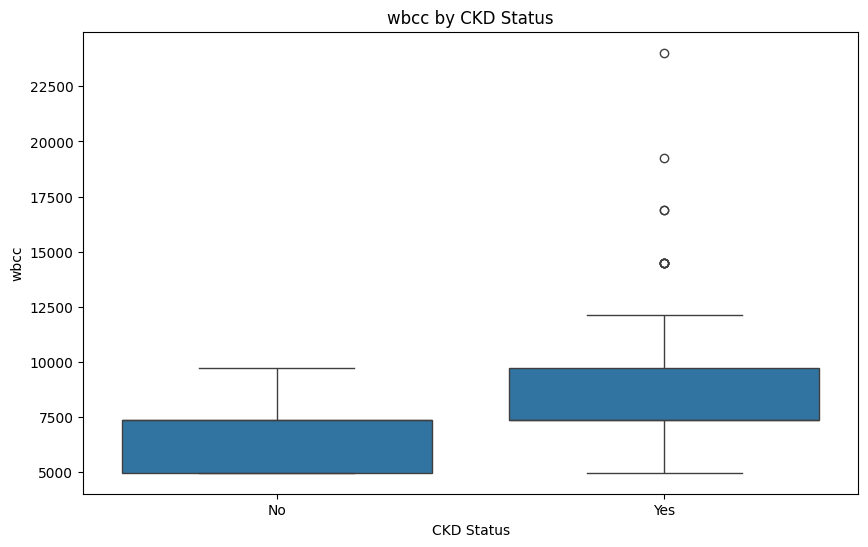

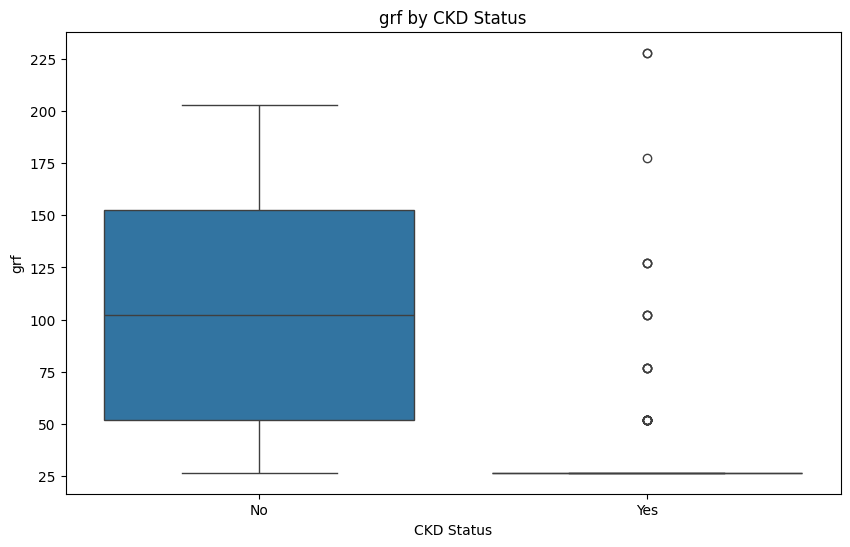

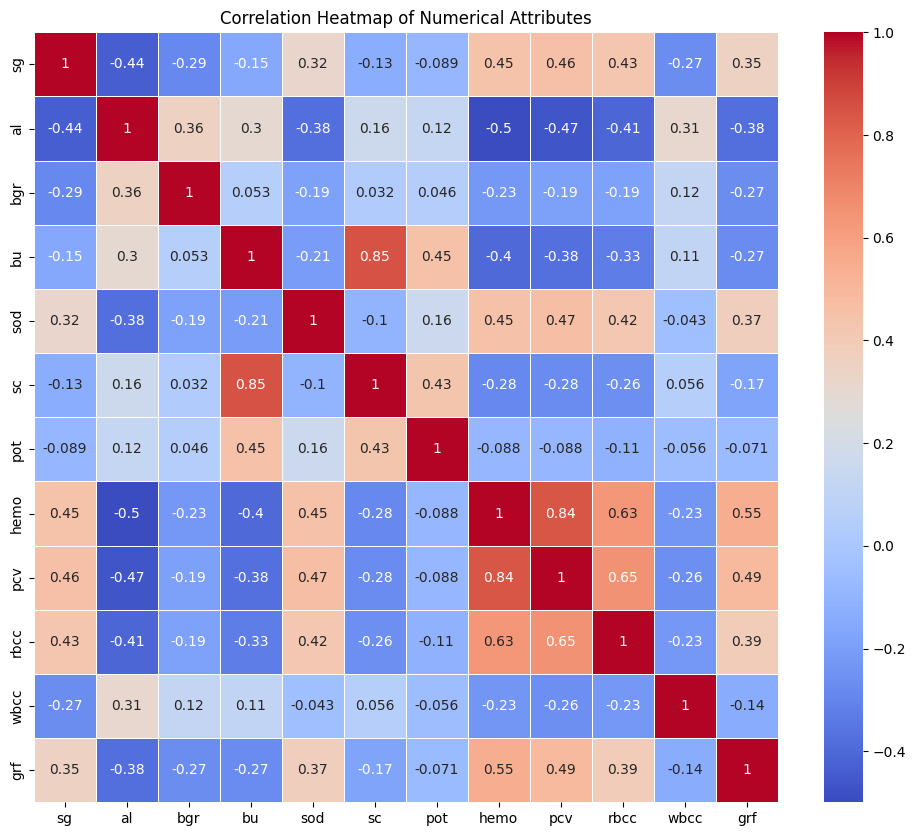

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/CKD Data.csv'
df = pd.read_csv(file_path)

# Data Cleaning: Handling missing or inconsistent data
# Removing the first row since it appears to be attribute type information
df_cleaned = df.iloc[2:].reset_index(drop=True)

# Handling missing values - replacing missing values with NaN and imputing them with appropriate measures
df_cleaned.replace("?", pd.NA, inplace=True)
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)  # Impute categorical with mode
    else:
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)  # Impute numerical with median

# Cleaning numerical columns that have ranges or inconsistent formats
def clean_numerical_column(column):
    # Replace ranges and other inconsistent values with NaN
    column = column.str.extract(r'([0-9.]+)').astype(float)
    return column

numerical_columns_to_clean = ["sg", "al", "bgr", "bu", "sod", "sc", "pot", "hemo", "pcv", "rbcc", "wbcc", "grf", "age"]
for col in numerical_columns_to_clean:
    df_cleaned[col] = clean_numerical_column(df_cleaned[col])

# Converting all variables to categorical types with specified categories in one step
# Categorizing discrete and numerical attributes
categorical_mappings = {
    "bp (Diastolic)": {
        "0": "Low",
        "1": "Normal",
        "2": "High"
    },
    "bp limit": {
        "0": "Normal",
        "1": "Stage 1 Hypertension",
        "2": "Stage 2 Hypertension"
    },
    "class": {
        "ckd": "Yes",
        "notckd": "No"
    },
    "rbc": {
        "0": "Normal",
        "1": "Abnormal"
    },
    "su": {
        "<1.007": "None",
        "1.009-1.011": "Trace",
        "1.015-1.017": "Moderate",
        "1.019-1.021": "High",
        ">1.023": "Very High"
    },
    "pc": {
        "0": "Normal",
        "1": "Abnormal"
    },
    "pcc": {
        "0": "Not present",
        "1": "Present"
    },
    "ba": {
        "0": "Not present",
        "1": "Present"
    },
    "htn": {
        "0": "No",
        "1": "Yes"
    },
    "dm": {
        "0": "No",
        "1": "Yes"
    },
    "cad": {
        "0": "No",
        "1": "Yes"
    },
    "appet": {
        "0": "Good",
        "1": "Poor"
    },
    "pe": {
        "0": "No",
        "1": "Yes"
    },
    "ane": {
        "0": "No",
        "1": "Yes"
    },
    "stage": {
        "s1": "Stage 1",
        "s2": "Stage 2",
        "s3": "Stage 3",
        "s4": "Stage 4",
        "s5": "Stage 5"
    },
    "affected": {
        "0": "Left or Right",
        "1": "Both"
    }
}

df_cleaned = df_cleaned.apply(lambda col: col.map(categorical_mappings[col.name]) if col.name in categorical_mappings else col)
for col in categorical_mappings.keys():
    df_cleaned[col] = df_cleaned[col].astype('category')

# Summary Statistics: Descriptive statistics for key attributes
summary_statistics = df_cleaned.describe(include='category')

# Display cleaned dataset and summary statistics
print("Cleaned Chronic Kidney Disease Dataset:")
print(df_cleaned.head())

print("\nSummary Statistics:")
print(summary_statistics)

# Attribute Information: Description of available attributes in the dataset
attribute_info = {
    "bp (Diastolic)": "Diastolic blood pressure values categorized as 'Low', 'Normal', or 'High'.",
    "bp limit": "Blood pressure limit category (e.g., 'Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension').",
    "sg": "Specific gravity of urine categorized into discrete ranges.",
    "al": "Albumin concentration categorized into discrete ranges.",
    "class": "Patient classification, either chronic kidney disease (ckd) or non-ckd (Yes or No).",
    "rbc": "Red Blood Cells categorized as 'Normal' or 'Abnormal'.",
    "su": "Sugar levels in the urine categorized as 'None', 'Trace', 'Moderate', 'High', or 'Very High'.",
    "pc": "Pus Cell categorized as 'Normal' or 'Abnormal'.",
    "pcc": "Pus Cell Clumps categorized as 'Present' or 'Not present'.",
    "ba": "Bacteria in urine categorized as 'Present' or 'Not present'.",
    "htn": "Hypertension categorized as 'Yes' or 'No'.",
    "dm": "Diabetes Mellitus categorized as 'Yes' or 'No'.",
    "cad": "Coronary Artery Disease categorized as 'Yes' or 'No'.",
    "appet": "Appetite status categorized as 'Good' or 'Poor'.",
    "pe": "Pedal Edema categorized as 'Yes' or 'No'.",
    "ane": "Anemia categorized as 'Yes' or 'No'.",
    "stage": "CKD stages categorized as 'Stage 1', 'Stage 2', etc.",
    "affected": "Affected area categorized as 'Left or Right' or 'Both'.",
    "age": "Patient age range categorized.",
    "bgr": "Random blood glucose level categorized into discrete ranges.",
    "bu": "Blood urea level categorized into discrete ranges.",
    "sod": "Serum sodium level categorized into discrete ranges.",
    "sc": "Serum creatinine level categorized into discrete ranges.",
    "pot": "Serum potassium level categorized into discrete ranges.",
    "hemo": "Hemoglobin level categorized into discrete ranges.",
    "pcv": "Packed cell volume categorized into discrete ranges.",
    "rbcc": "Red blood cell count categorized into discrete ranges.",
    "wbcc": "White blood cell count categorized into discrete ranges.",
    "grf": "Glomerular filtration rate categorized into discrete ranges."
}

# Display attribute information
print("\nAttribute Information:")
for attribute, description in attribute_info.items():
    print(f"{attribute}: {description}")

# Data Visualization for Categorical Relationships
# Distribution of 'class' (CKD vs Non-CKD)
sns.countplot(x='class', data=df_cleaned)
plt.title('Distribution of CKD vs Non-CKD')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Countplot for categorical features vs CKD status
categorical_features = ['bp (Diastolic)', 'rbc', 'pc', 'pcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for feature in categorical_features:
    sns.catplot(x=feature, hue='class', kind='count', data=df_cleaned, height=6, aspect=1.5)
    plt.title(f'{feature} vs CKD Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Heatmap for relationships between categorical features
categorical_data = df_cleaned[categorical_features + ['class']]
categorical_encoded = pd.get_dummies(categorical_data)
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_encoded.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded Categorical Attributes')
plt.show()

# Numerical Data Analysis
# Distribution plots for numerical features comparing CKD vs Non-CKD
numerical_features = ['sg', 'al', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=feature, hue='class', kde=True, element='step', stat='density')
    plt.title(f'Distribution of {feature} by CKD Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Boxplot for numerical features by CKD status
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class', y=feature, data=df_cleaned)
    plt.title(f'{feature} by CKD Status')
    plt.xlabel('CKD Status')
    plt.ylabel(feature)
    plt.show()

# Heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()


